# Data Analysis

First step is to import all the libraries needed to run this jupyter notebook.

In [1]:
#Import the data-pipeline.ipynb file
import data_utils
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns

# Import the data from the data-pipeline.ipynb file

pd.options.mode.use_inf_as_na = True
csv_awardsPlayers, csv_coaches, csv_playersTeams, csv_players, csv_seriesPost, csv_teamsPost, csv_teams = data_utils.load_data()


/var/folders/qb/xs9s2rhj0v3b60fwkgth0mgc0000gn/T/ipykernel_535/2524067569.py:13: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


Second step is to start analyse each dataset individually and understand the data itself.

## Series Post

**year** - from 1 to 10


**round**:
    - FR - first round
    - CF - conference finals
    - F - finals


**series** - go from A to G. First-round series are A, B, C and D.  Conference Finals are E and F. Finals are G.


**tmIDWinner** - Id of the winning team.


**lgIDWinner** - Id of the league where the winning team plays.


**tmIDLoser** - Id of the losing team.


**lgIDLoser** - Id of the league where the losing team plays.


**W** - Number of games won by the winning team in the series;


**L** - Number of games won by the losing team in the series;

Check the distinct values for each column and display in histograms the distribution of the values.

In [1]:
# Check the distinct values
columns = ['year', 'round', 'series', 'tmIDWinner', 'lgIDWinner', 'tmIDLoser', 'lgIDLoser', 'W', 'L']

for column in columns:
    print(f"The distinct values for {column} are : {csv_seriesPost[column].nunique()}")



missing_columns = csv_seriesPost.columns[csv_seriesPost.isna().any()]
print("The columns that have missing values are:")
print(missing_columns)

# Create histograms
for column in columns:
    plt.figure(figsize=(10, 6))
    plt.hist(csv_seriesPost[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

NameError: name 'csv_seriesPost' is not defined

From the analysis of the csv above we can check that the columns : lgIDLoser and lgIDWinner have only one distinct value, so the columns can be dropped.

## Teams

**year** - from 1 to 10;

**lgID** - league ID (always WNBA);

**tmID** - team ID;

**franchID** - franchise ID;

**confID** - conference ID;

**divID** - division ID;

**rank** - rank on the regular season coming into the playoffs;

**playoff** - tells if a team went or not to the playoffs;

**seeded** - always 0;

**firstRound**, **semis** , **finals** - tells if a team won or not the first-round, semis or finals;

**name** - team's name;

**o_fgm**: Field goals made

**o_fga**: Field goals attempted

**o_ftm**: Free throws made

**o_fta**: Free throws attempted

**o_3pm**: Three-pointers made

**o_3pa**: Three-pointers attempted

**o_oreb**: Offensive rebounds

**o_dreb**: Defensive rebounds

**o_reb**: Total rebounds

**o_asts**: Assists

**o_pf**: Personal fouls

**o_stl**: Steals

**o_to**: Turnovers

**o_blk**: Blocks

**o_pts**: Points scored

**d_fgm**: Field goals made by opponents

**d_fga**: Field goals attempted by opponents

**d_ftm**: Free throws made by opponents

**d_fta**: Free throws attempted by opponents

**d_3pm**: Three-pointers made by opponents

**d_3pa**: Three-pointers attempted by opponents

**d_oreb**: Offensive rebounds by opponents

**d_dreb**: Defensive rebounds by opponents

**d_reb**: Total rebounds by opponents

**d_asts**: Assists by opponents

**d_pf**: Personal fouls by opponents

**d_stl**: Steals by opponents

**d_to**: Turnovers by opponents

**d_blk**: Blocks by opponents

**d_pts**: Points scored by opponents

**tmORB**: Team offensive rebounds

**tmDRB**: Team defensive rebounds

**tmTRB**: Team total rebounds

**opptmORB**: Opponent team offensive rebounds

**opptmDRB**: Opponent team defensive rebounds

**opptmTRB**: Opponent team total rebounds

**won**: Games won in the season

**lost**: Games lost in the season

**GP**: Games played

**homeW**: Home games won

**homeL**: Home games lost

**awayW**: Away games won

**awayL**: Away games lost

**confW**: Conference games won

**confL**: Conference games lost

**min** - total minutes played by a team in a season (?);

**attend** - number of spectators at the team's games over a season;

**arena** - name of the team's arena;

The distinct values for year are : 10
The distinct values for lgID are : 1
The distinct values for tmID are : 20
The distinct values for franchID are : 18
The distinct values for confID are : 2
The distinct values for rank are : 8
The distinct values for divID are : 0
The distinct values for seeded are : 1
The distinct values for playoff are : 2
The distinct values for arena are : 22
The columns that have missing values are:
Index(['divID', 'firstRound', 'semis', 'finals'], dtype='object')


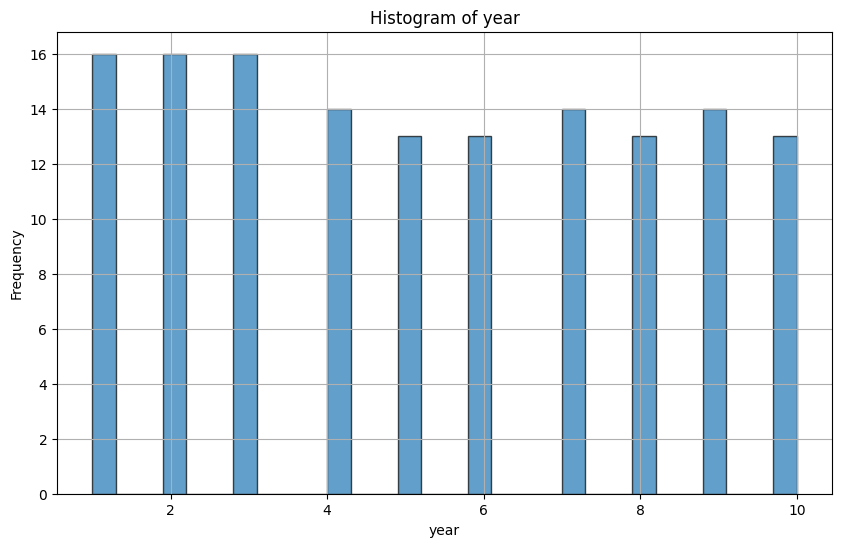

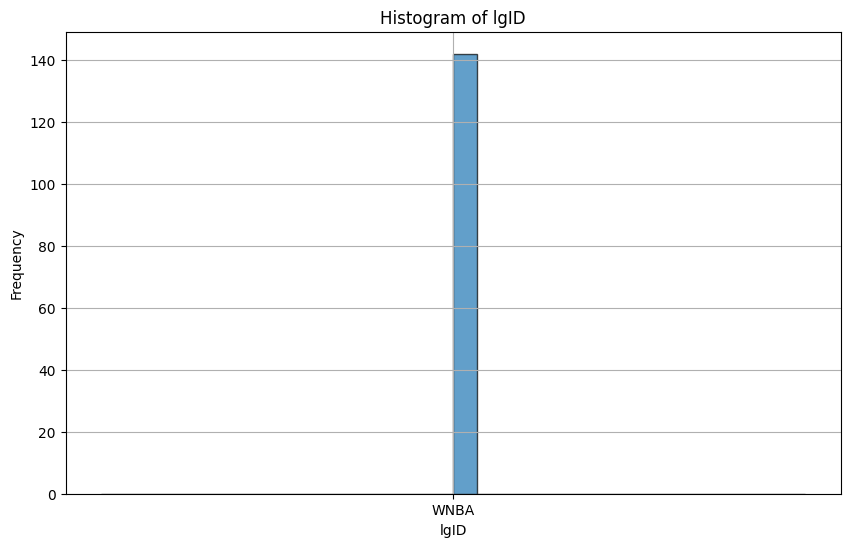

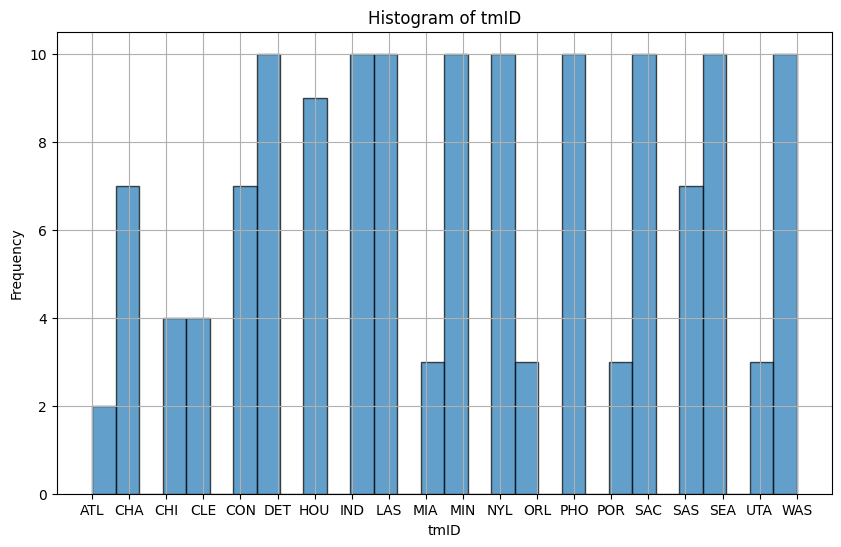

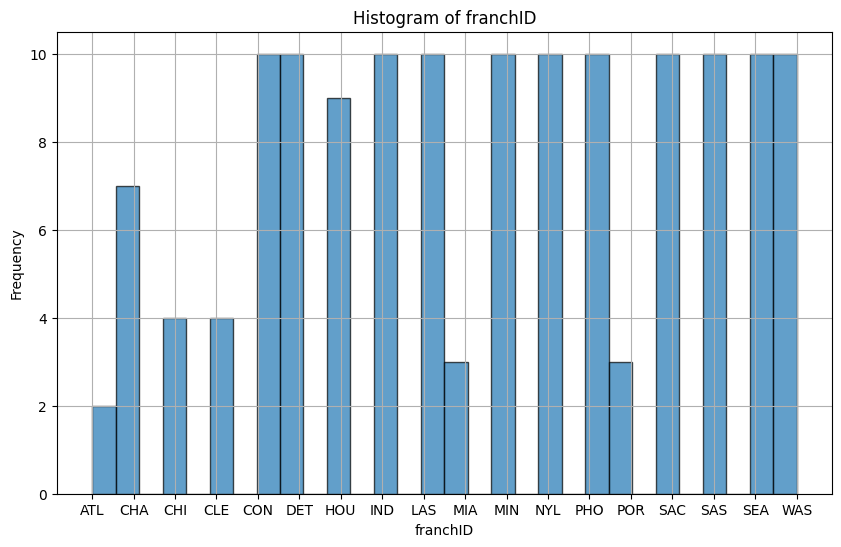

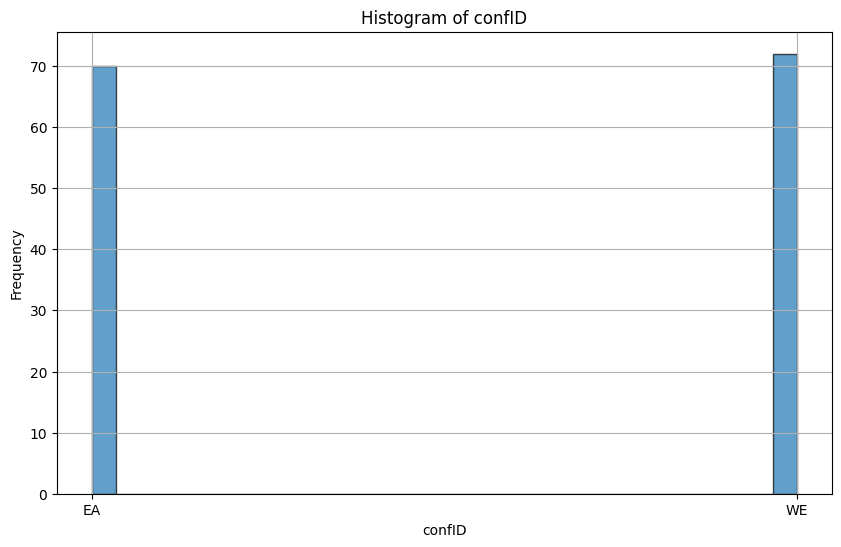

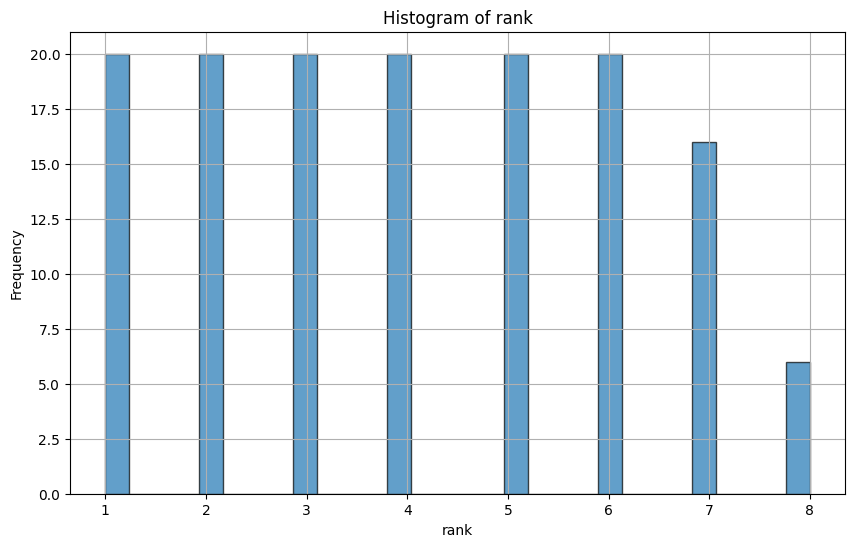

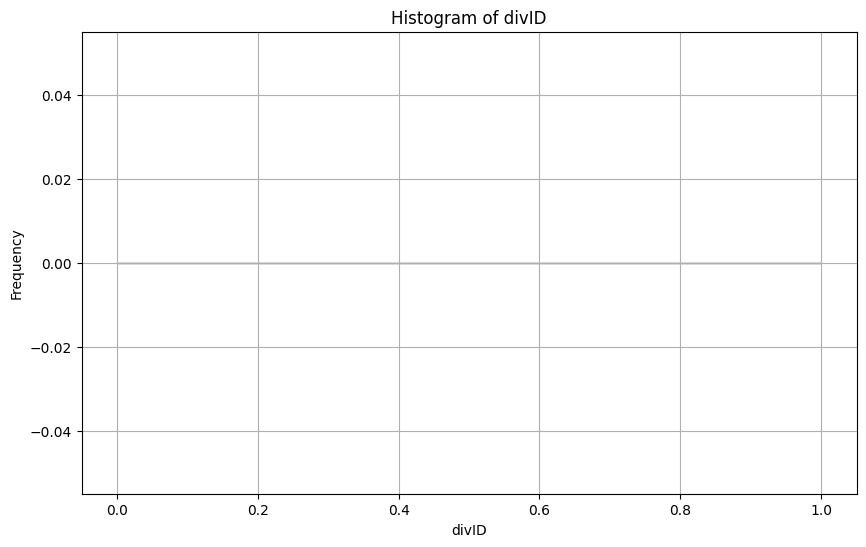

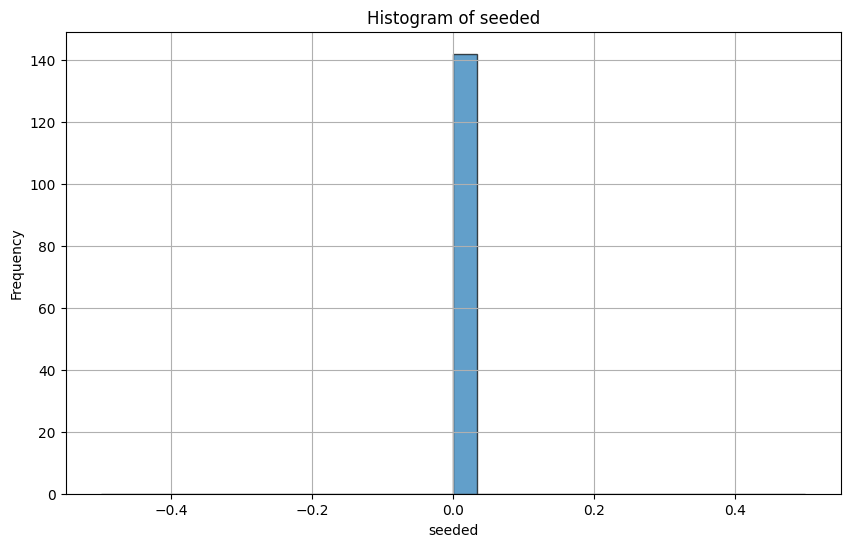

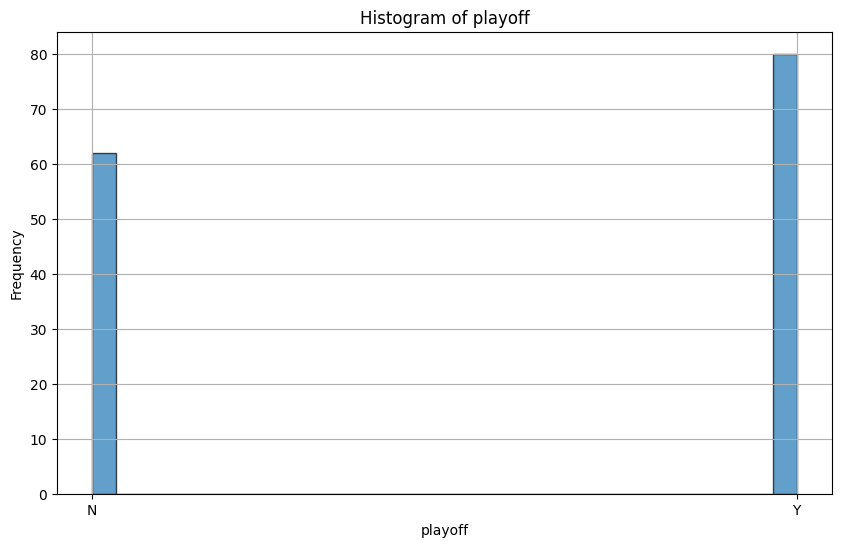

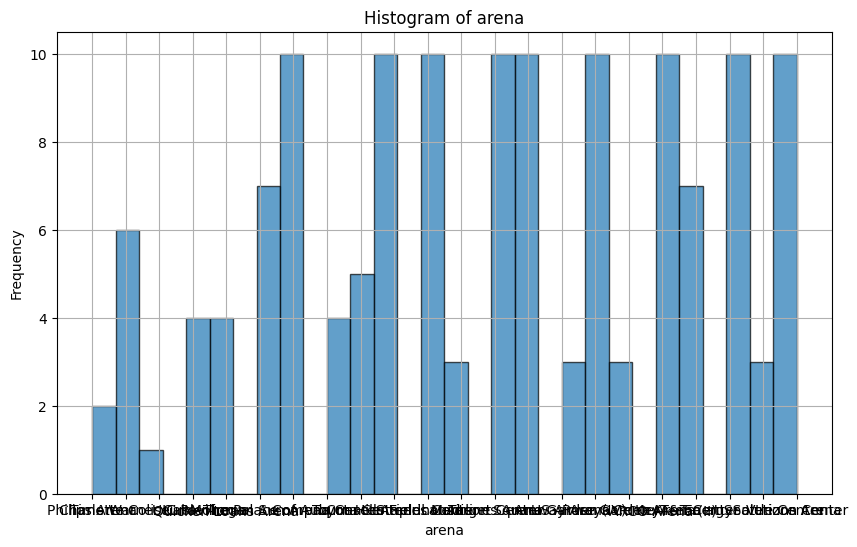

In [3]:
columns = ['year', 'lgID', 'tmID', 'franchID', 'confID', 'rank', 'divID', 'seeded', 'playoff', 'arena']

# Check the distinct values for each column
for column in columns:
    print(f"The distinct values for {column} are : {csv_teams[column].nunique()}")


missing_columns = csv_teams.columns[csv_teams.isna().any()]
print("The columns that have missing values are:")
print(missing_columns)


# Create histograms
for column in columns:
    plt.figure(figsize=(10, 6))
    plt.hist(csv_teams[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


Check the logical consistency of the data:

In [4]:
columns_attributes = [
    "o_fgm", "o_fga", "o_ftm", "o_fta", "o_3pm", "o_3pa", 
    "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl", 
    "o_to", "o_blk", "o_pts", "d_fgm", "d_fga", "d_ftm", 
    "d_fta", "d_3pm", "d_3pa"
]

# Check if the "made" columns are always equal to or less than the "attempted" columns
for column in columns_attributes:
    count_discrepancies = len(csv_teams[csv_teams[column] > csv_teams[column.replace('m', 'a')]])
    if count_discrepancies > 0:
        print(f"The number of rows where '{column}' is greater than the corresponding attempted column is: {count_discrepancies}")
    else: 
        print(f"No discrepancies found for column {column}")
columns_sum = ["GP"]

# Check if the sum of won and lost columns is always equal to the GP column
for column in columns_sum:
    count_mismatches = len(csv_teams[csv_teams[column] != csv_teams['won'] + csv_teams['lost']])
    if count_mismatches > 0:
        print(f"The number of rows where '{column}' is different from the sum of 'won' and 'lost' columns is: {count_mismatches}")
    else: 
        print(f"No discrepancies found for column {column}")


# Check if when the Playoff is N the firstRound must be an empty string
count_mismatches = len(csv_teams[(csv_teams['playoff'] == 'N') & (csv_teams['firstRound'] != 'nan')])
if count_mismatches > 0:
    print(f"The number of rows where 'playoff' is 'N' and 'firstRound' is not an empty string is: {count_mismatches}")
else: 
    print(f"No mismatches in the 'playoff' and 'firstRound' columns")
# Check when the Playoff is Y the firstRound must not be an empty string
count_mismatches = len(csv_teams[(csv_teams['playoff'] == 'Y') & (csv_teams['firstRound'] == 'nan')])
if count_mismatches > 0: 
    print(f"The number of rows where 'playoff' is 'Y' and 'firstRound' is an empty string is: {count_mismatches}")
else: 
    print(f"No mismatches in the 'playoff' and 'firstRound' columns")

No discrepancies found for column o_fgm
No discrepancies found for column o_fga
No discrepancies found for column o_ftm
No discrepancies found for column o_fta
No discrepancies found for column o_3pm
No discrepancies found for column o_3pa
No discrepancies found for column o_oreb
No discrepancies found for column o_dreb
No discrepancies found for column o_reb
No discrepancies found for column o_asts
No discrepancies found for column o_pf
No discrepancies found for column o_stl
No discrepancies found for column o_to
No discrepancies found for column o_blk
No discrepancies found for column o_pts
No discrepancies found for column d_fgm
No discrepancies found for column d_fga
No discrepancies found for column d_ftm
No discrepancies found for column d_fta
No discrepancies found for column d_3pm
No discrepancies found for column d_3pa
No discrepancies found for column GP
The number of rows where 'playoff' is 'N' and 'firstRound' is not an empty string is: 62
No mismatches in the 'playoff' an

## Players

**bioID** - player ID;

**pos** - player position;

**firstseason** - first season played;

**lastseason** - last season played;

**height** - player height;

**weight** - player weight;

**college** - college where the player played;

**collegeOther** - other college where the player played;

**birthDate** - player birth date;

**deathDate** - player death date;


The distinct bioID are : 893
The distinct pos are : 7
The distinct firstseason are : 1
The distinct lastseason are : 1
The distinct height are : 21
The distinct weight are : 105
The distinct college are : 160
The distinct collegeOther are : 11
The distinct birthDate are : 764
The distinct deathDate are : 5
The columns that have missing values are:
Index(['pos', 'college', 'collegeOther'], dtype='object')


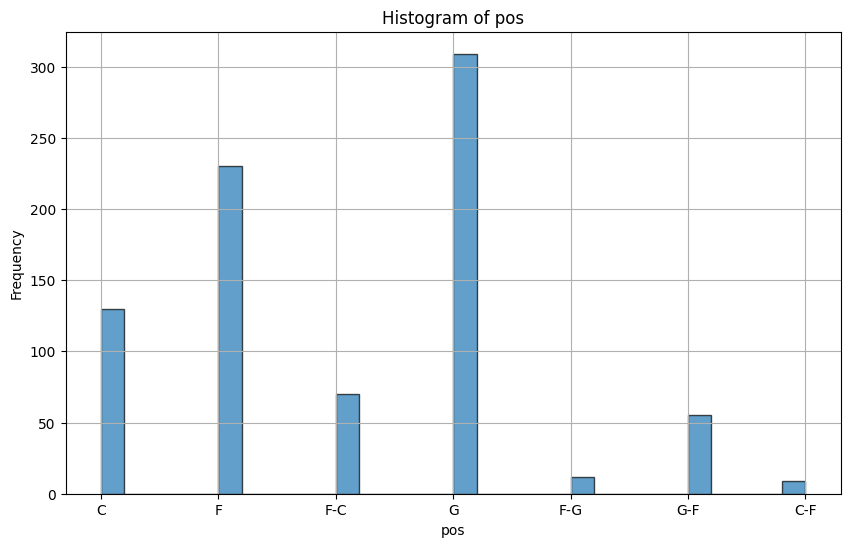

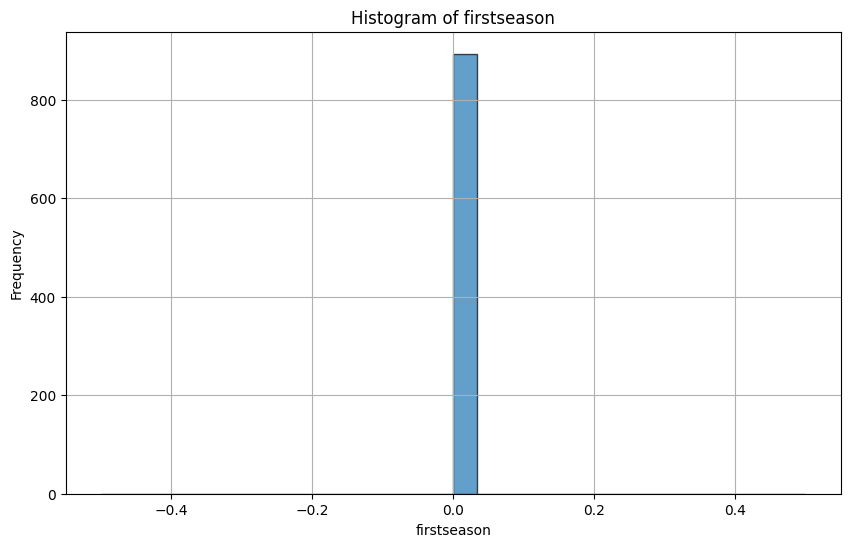

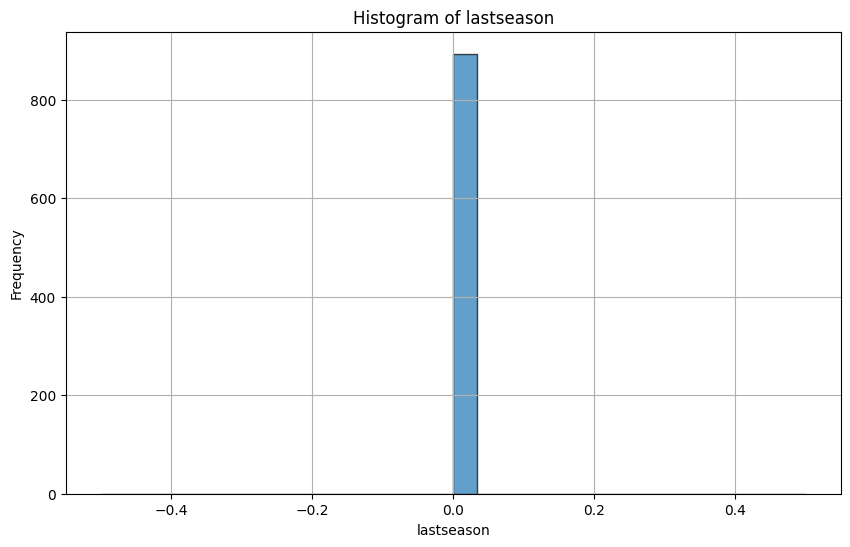

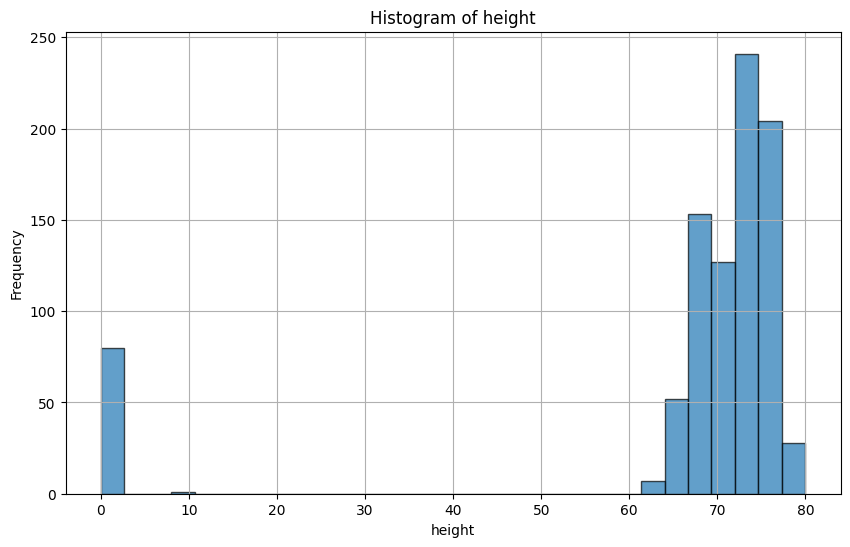

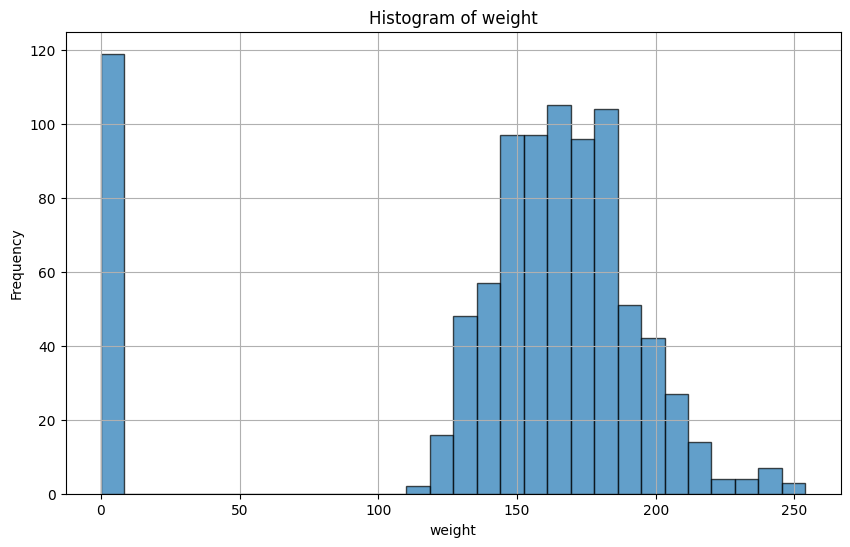

In [5]:
columns = ["bioID","pos","firstseason","lastseason","height","weight","college","collegeOther","birthDate","deathDate"]

#Check the distinct values of each column
for column in columns:
    print(f"The distinct {column} are : {csv_players[column].nunique()}")

#Check the missing values of each column
missing_columns = csv_players.columns[csv_players.isna().any()]
print("The columns that have missing values are:")
print(missing_columns)

columns = ['pos', 'firstseason', 'lastseason', 'height', 'weight']

for column in columns:
    plt.figure(figsize=(10, 6))
    plt.hist(csv_players[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Check the logical consistency of the data:

In [6]:
count_mismatches = len(csv_players[(csv_players['firstseason']> csv_players['lastseason'])])
if count_mismatches > 0: 
    print(f"The number of rows where 'firstseason' is greater than 'lastseason' is: {count_mismatches}")
else:
    print(f"No mismatches in the 'firstseason' and 'lastseason' columns")

count_mistmatches = len(csv_players[(csv_players['birthDate']> csv_players['deathDate'])])
if count_mismatches > 0: 
    print(f"The number of rows where 'birthDate' is greater than 'deathDate' is: {count_mismatches}")
else:
    print(f"No mismatches in the 'birthDate' and 'deathDate' columns")

No mismatches in the 'firstseason' and 'lastseason' columns
No mismatches in the 'birthDate' and 'deathDate' columns


## Players Teams

**playerID** - player ID;

**year**  - from 1 to 10 (current season);

**stint** - player's stint in the team;

**tmID**  - team ID;

**lgID**  - league ID;

**GP** - games played;

**GS**  - games started;

**minutes**  -  minutes played;

**points** - points scored;

**oRebounds** - offensive rebounds;

**dRebounds**  - defensive rebounds;

**rebounds** - total rebounds;

**assists**  - assists;

**steals** - steals;

**blocks** - blocks;

**turnovers** 

**PF** 

**fgAttempted** 

**fgMade** 

**ftAttempted** 

**ftMade** 

**threeAttempted** 

**threeMade** 

**dq** 

**PostGP** 

**PostGS** 

**PostMinutes** 

**PostPoints** 

**PostoRebounds** 

**PostdRebounds** 

**PostRebounds** 

**PostAssists** 

**PostSteals** 

**PostBlocks** 

**PostTurnovers** 

**PostPF** 

**PostfgAttempted** 

**PostfgMade** 

**PostftAttempted** 

**PostftMade** 

**PostthreeAttempted** 

**PostthreeMade** 

**PostDQ**


The distinct GP are : 34
The distinct GS are : 35
The distinct minutes are : 899
The distinct points are : 530
The distinct oRebounds are : 111
The distinct dRebounds are : 203
The distinct rebounds are : 270
The distinct assists are : 174
The distinct steals are : 87
The distinct blocks are : 77
The distinct turnovers are : 118
The distinct PF are : 137
The distinct fgAttempted are : 456
The distinct fgMade are : 225
The distinct ftAttempted are : 200
The distinct ftMade are : 165
The distinct threeAttempted are : 187
The distinct threeMade are : 82
The distinct dq are : 8
The distinct PostGP are : 12
The distinct PostGS are : 12
The distinct PostMinutes are : 254
The distinct PostPoints are : 138
The distinct PostoRebounds are : 29
The distinct PostdRebounds are : 53
The distinct PostRebounds are : 74
The distinct PostAssists are : 49
The distinct PostSteals are : 21
The distinct PostBlocks are : 20
The distinct PostTurnovers are : 33
The distinct PostPF are : 39
The distinct PostfgA

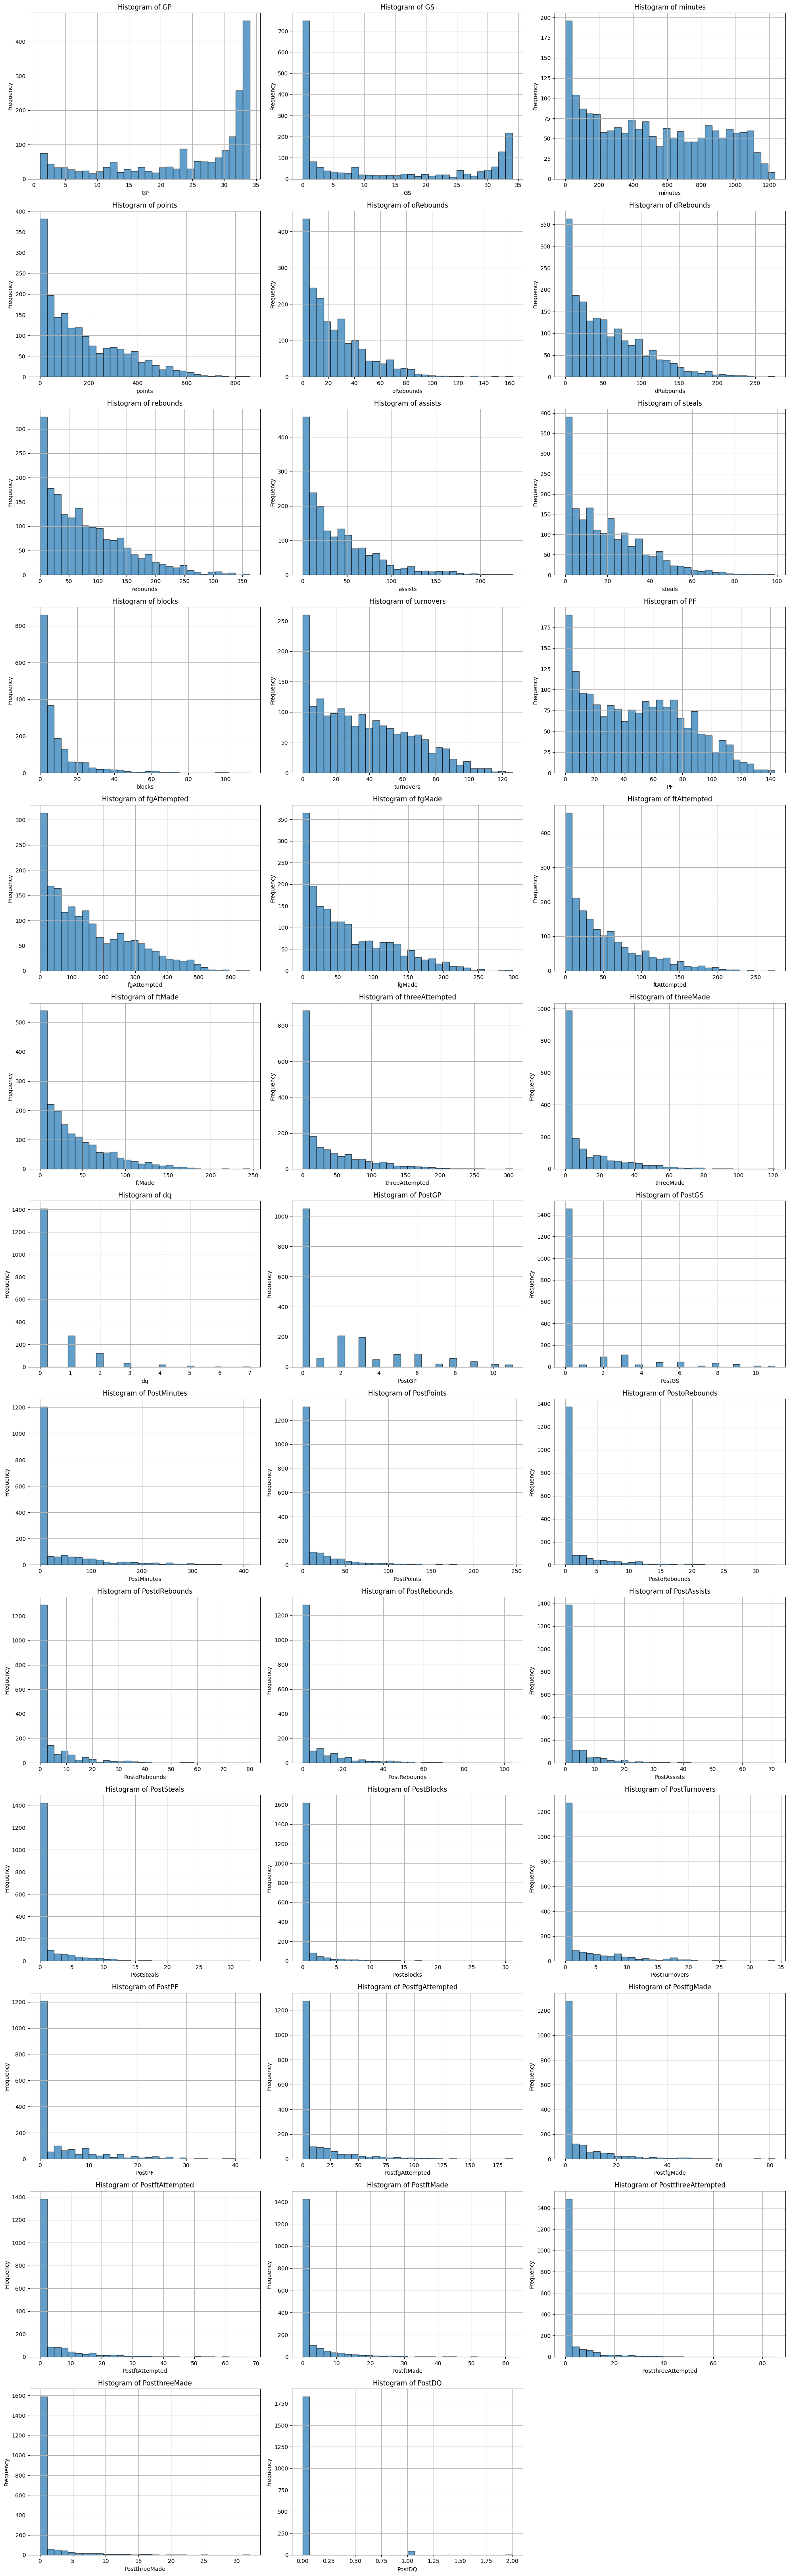

In [7]:
# List of columns
columns = [
    'GP', 'GS', 'minutes', 'points', 'oRebounds',
    'dRebounds', 'rebounds', 'assists', 'steals', 'blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade', 'ftAttempted',
    'ftMade', 'threeAttempted', 'threeMade', 'dq', 'PostGP', 'PostGS', 'PostMinutes', 'PostPoints', 'PostoRebounds', 'PostdRebounds',
    'PostRebounds', 'PostAssists', 'PostSteals', 'PostBlocks', 'PostTurnovers', 'PostPF', 'PostfgAttempted', 'PostfgMade', 'PostftAttempted', 'PostftMade',
    'PostthreeAttempted', 'PostthreeMade', 'PostDQ'
]

# Check the distinct values 
for column in columns:
    print(f"The distinct {column} are : {csv_playersTeams[column].nunique()}")

# Check the missing values
missing_columns = csv_playersTeams.columns[csv_playersTeams.isna().any()]
print("The columns that have missing values are:")
print(missing_columns)


n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

axes = axes.flatten()

# Create histograms
for i, column in enumerate(columns):
    data_with_nan = csv_playersTeams[column].fillna('NaN')
    axes[i].hist(data_with_nan, bins=30, edgecolor='k', alpha=0.7)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

Check the logical consistency of the data:

In [8]:
columns = ["fgAttempted","fgMade","ftAttempted","ftMade","threeAttempted","threeMade","dq","PostGP","PostGS","PostMinutes","PostPoints","PostoRebounds","PostdRebounds","PostRebounds","PostAssists","PostSteals","PostBlocks","PostTurnovers","PostPF","PostfgAttempted","PostfgMade","PostftAttempted","PostftMade","PostthreeAttempted","PostthreeMade"]

# Check if there are any discrepancies between the made and attempted columns
for column in columns:
    count_discrepancies = len(csv_playersTeams[csv_playersTeams[column] > csv_playersTeams[column.replace('Made', 'Attempted')]])
    if count_discrepancies > 0:
        print(f"The number of rows where '{column}' is greater than the corresponding attempted column is: {count_discrepancies}")
    else: 
        print(f"No discrepancies found for column {column}")

No discrepancies found for column fgAttempted
No discrepancies found for column fgMade
No discrepancies found for column ftAttempted
No discrepancies found for column ftMade
No discrepancies found for column threeAttempted
No discrepancies found for column threeMade
No discrepancies found for column dq
No discrepancies found for column PostGP
No discrepancies found for column PostGS
No discrepancies found for column PostMinutes
No discrepancies found for column PostPoints
No discrepancies found for column PostoRebounds
No discrepancies found for column PostdRebounds
No discrepancies found for column PostRebounds
No discrepancies found for column PostAssists
No discrepancies found for column PostSteals
No discrepancies found for column PostBlocks
No discrepancies found for column PostTurnovers
No discrepancies found for column PostPF
No discrepancies found for column PostfgAttempted
No discrepancies found for column PostfgMade
No discrepancies found for column PostftAttempted
No discrep

## Coach

The distinct coachID are : 57
The distinct year are : 10
The distinct tmID are : 20
The distinct lgID are : 1
The distinct stint are : 3
The distinct won are : 29
The distinct lost are : 28
The distinct post_wins are : 8
The distinct post_losses are : 6
The columns that have missing values are:
Index([], dtype='object')


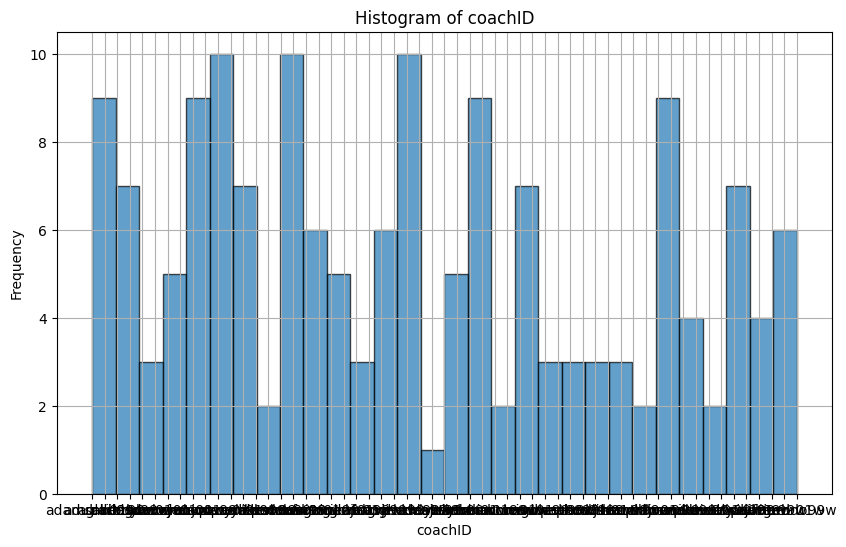

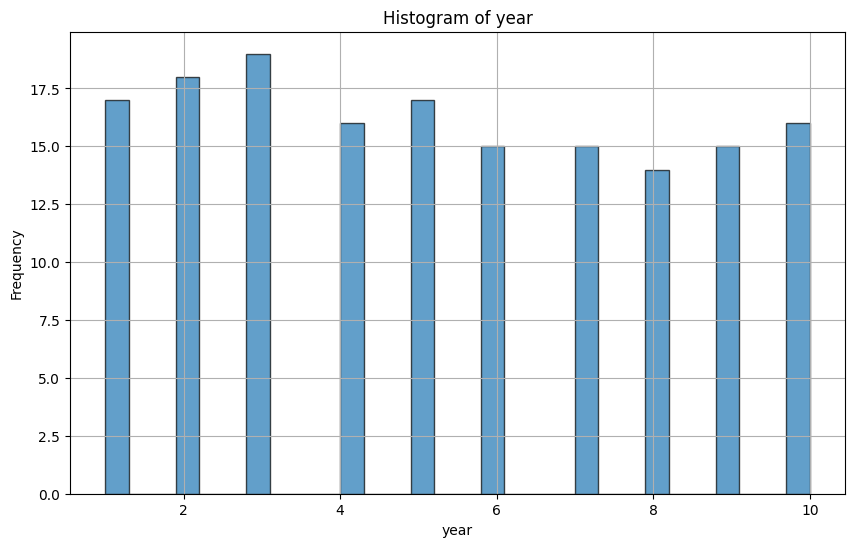

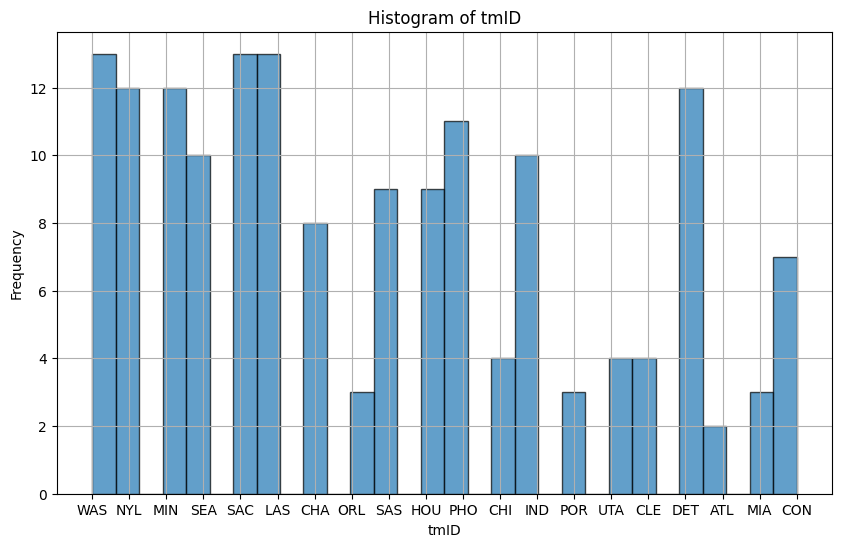

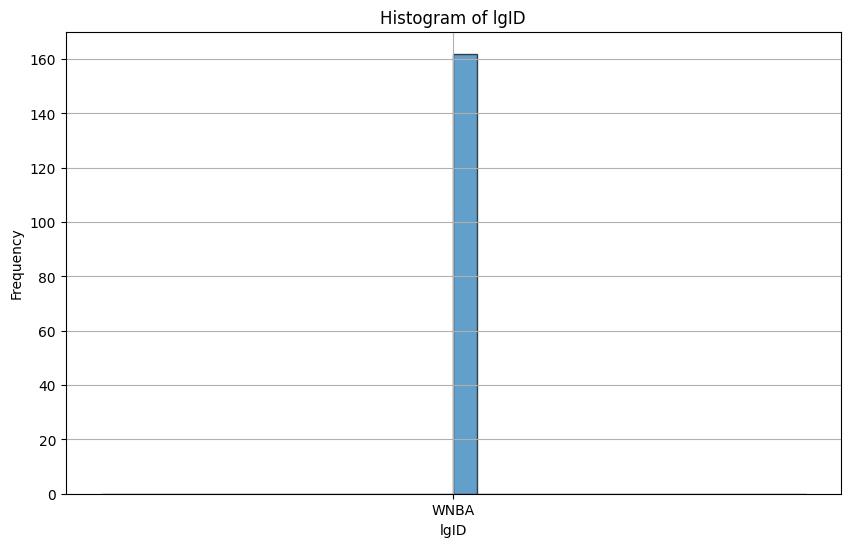

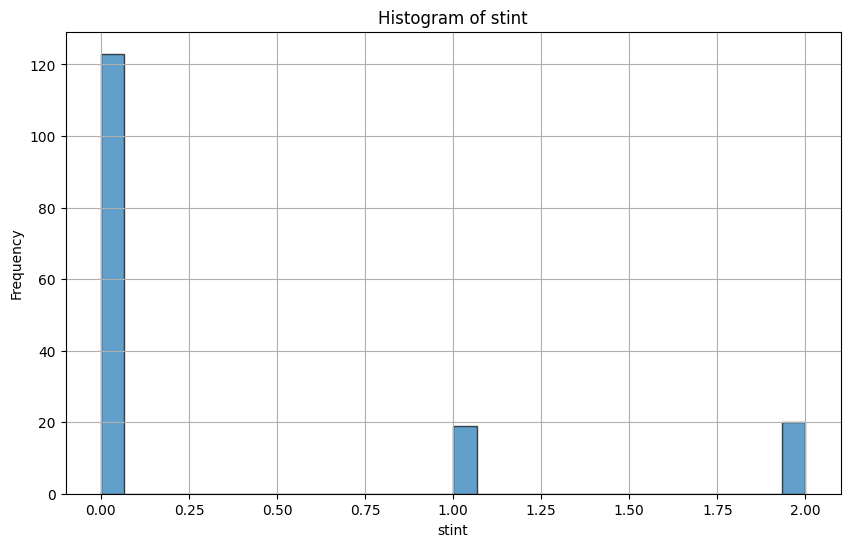

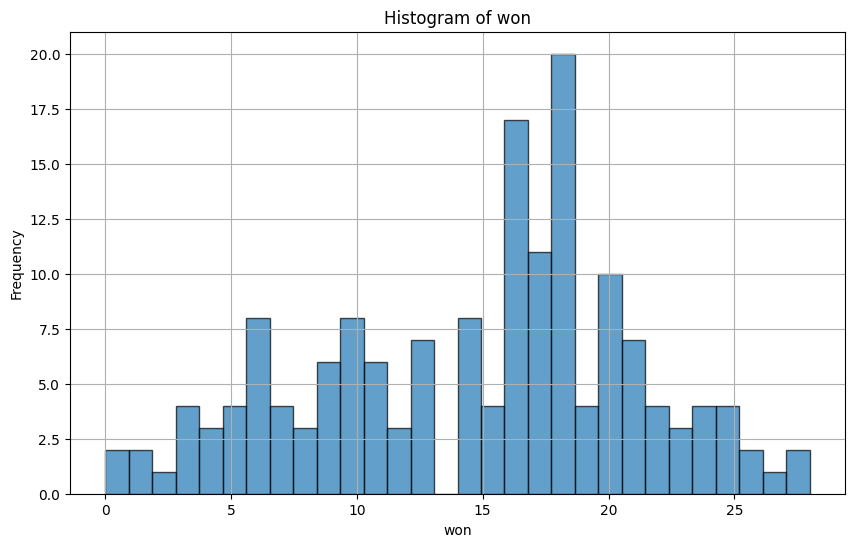

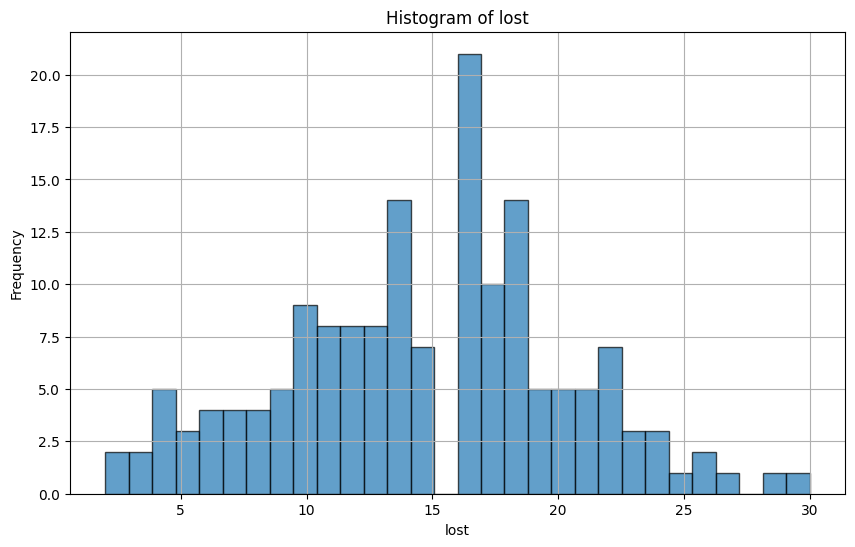

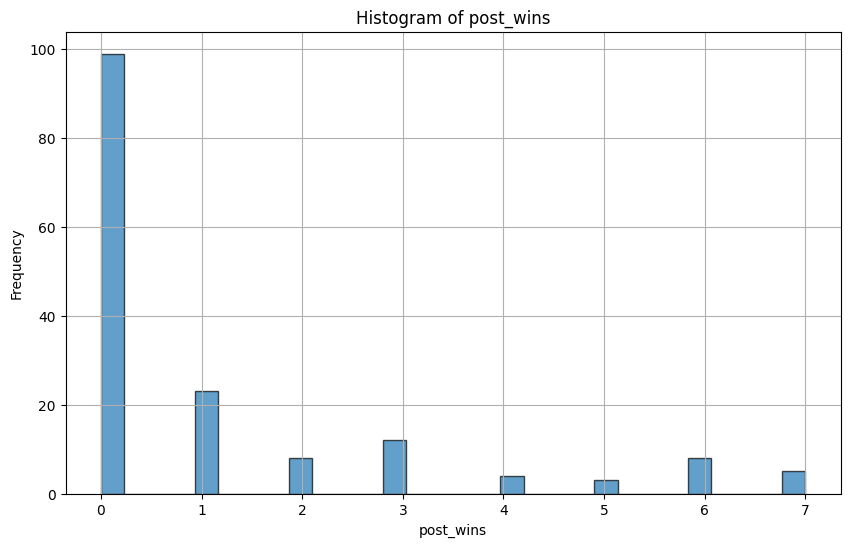

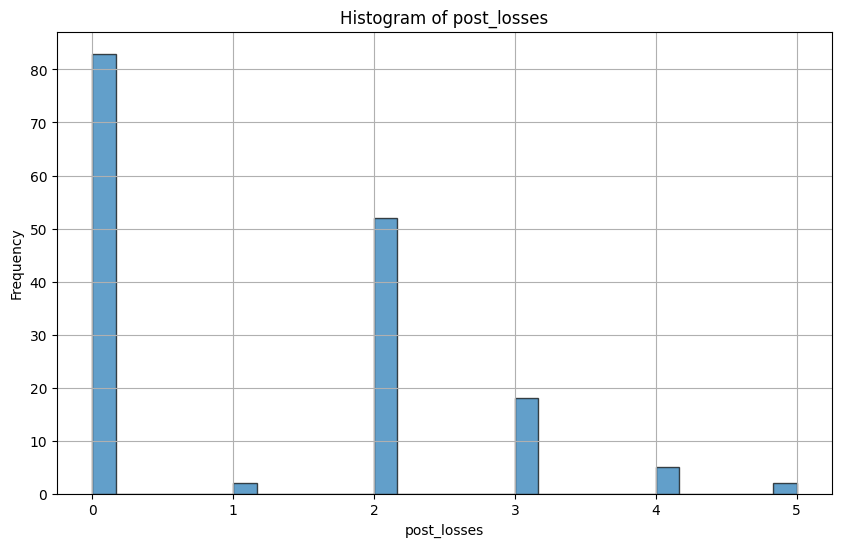

In [9]:
columns = ["coachID","year","tmID","lgID","stint","won","lost","post_wins","post_losses"
]

# Check the distinct values of each columns 
for column in columns: 
    print(f"The distinct {column} are : {csv_coaches[column].nunique()}")

# Check the missing values in the columns
missing_columns = csv_coaches.columns[csv_coaches.isna().any()]
print("The columns that have missing values are:")
print(missing_columns)


for column in columns:
    plt.figure(figsize=(10, 6))
    plt.hist(csv_coaches[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



## Awards Players

The distinct playerID are : 58
The distinct award are : 12
The distinct year are : 10
The distinct lgID are : 1
The columns that have missing values are:
Index([], dtype='object')


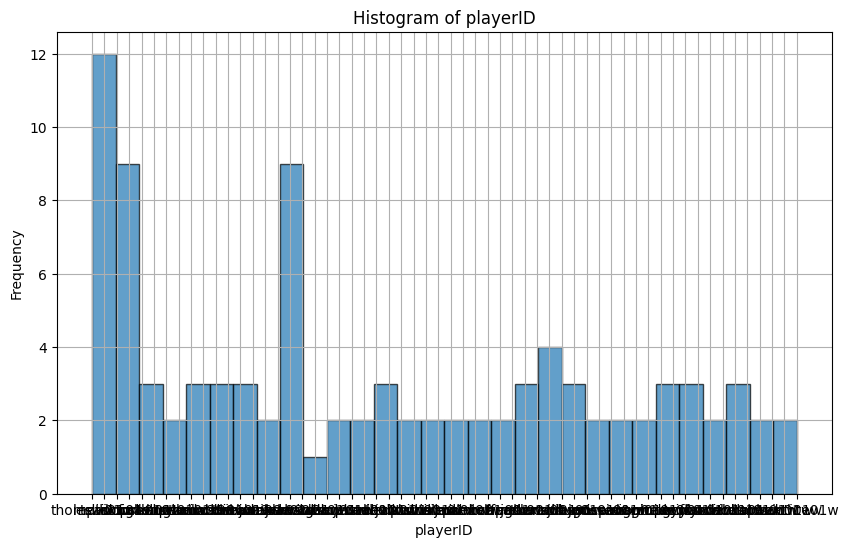

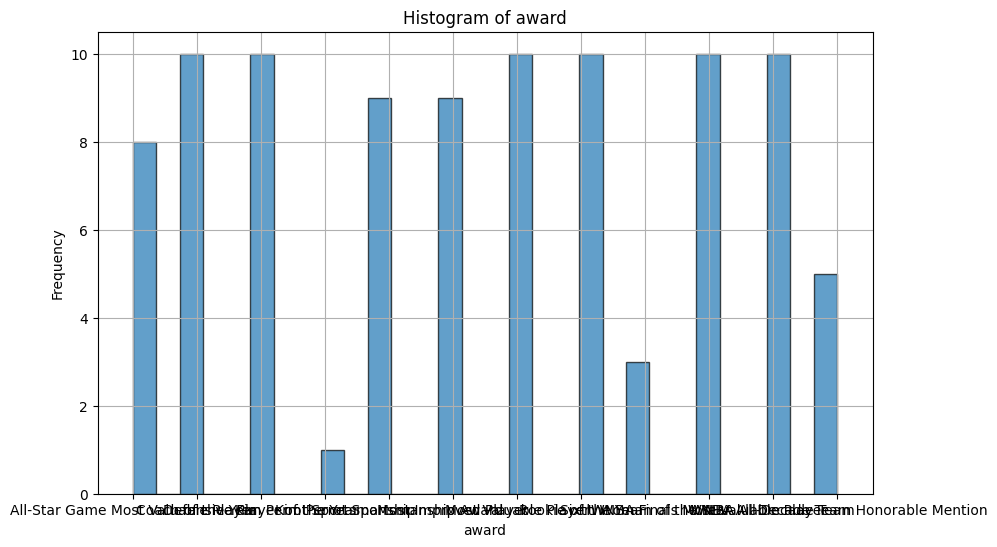

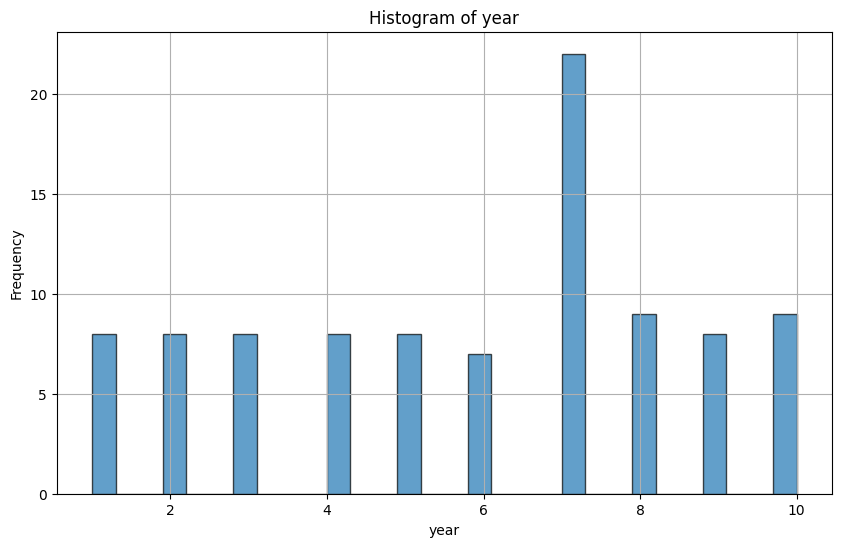

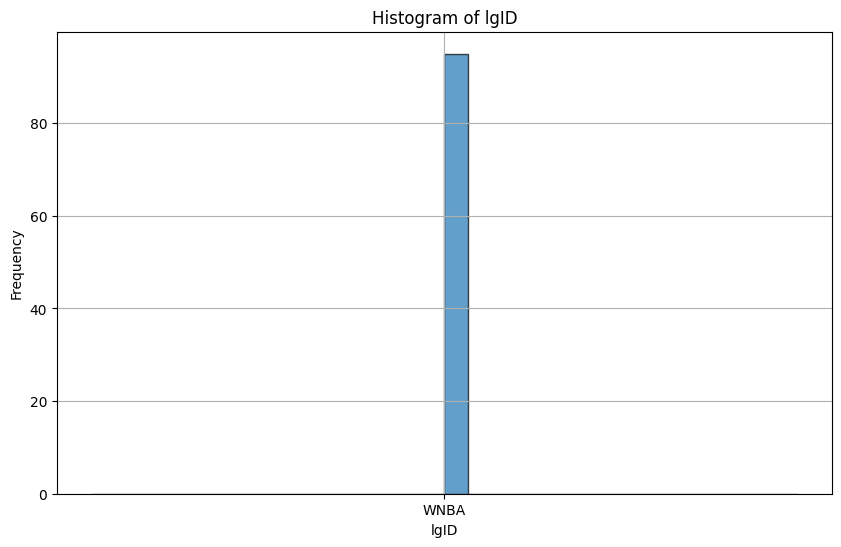

In [10]:
columns = ["playerID","award","year","lgID"]

# Check for distinct values in each column
for column in columns: 
    print(f"The distinct {column} are : {csv_awardsPlayers[column].nunique()}")

# Check the missing values in the columns
missing_columns = csv_awardsPlayers.columns[csv_awardsPlayers.isna().any()]
print("The columns that have missing values are:")
print(missing_columns)

# Create histograms
for column in columns:
    plt.figure(figsize=(10, 6))
    plt.hist(csv_awardsPlayers[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Teams Post

The distinct year are : 10
The distinct tmID are : 18
The distinct lgID are : 1
The distinct W are : 8
The distinct L are : 6
The columns that have missing values are:
Index([], dtype='object')


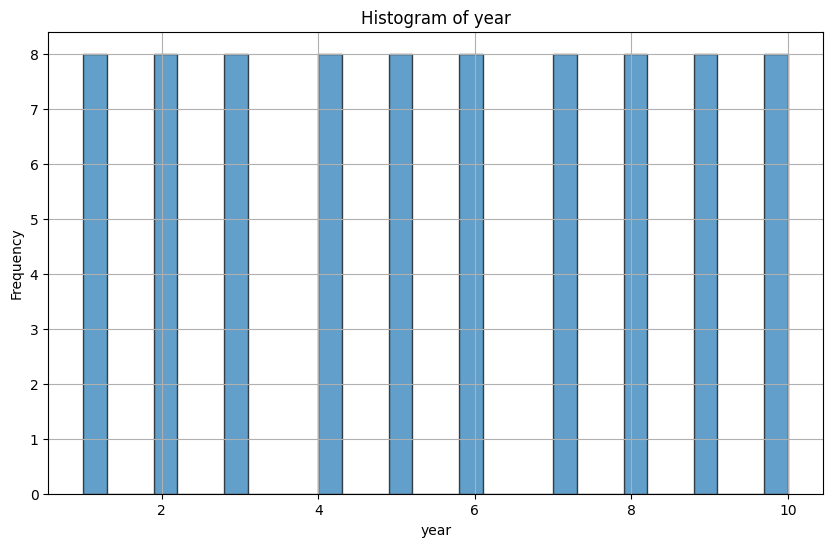

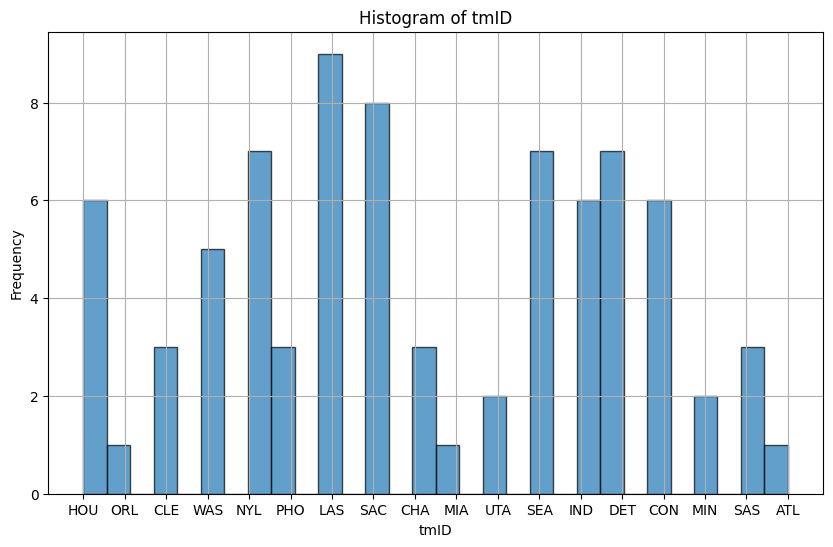

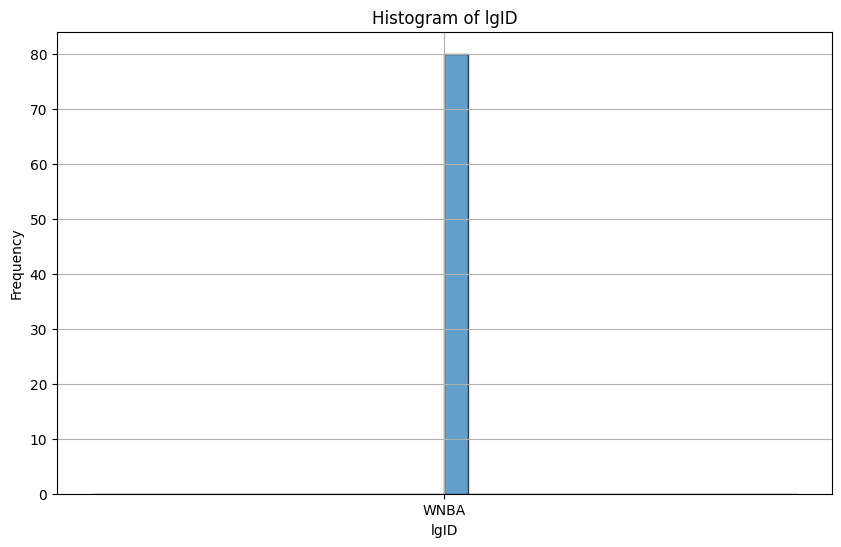

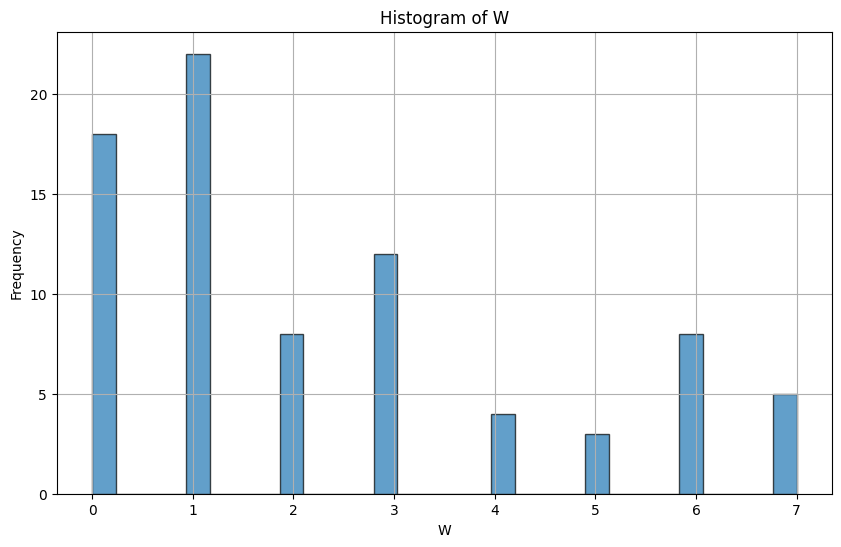

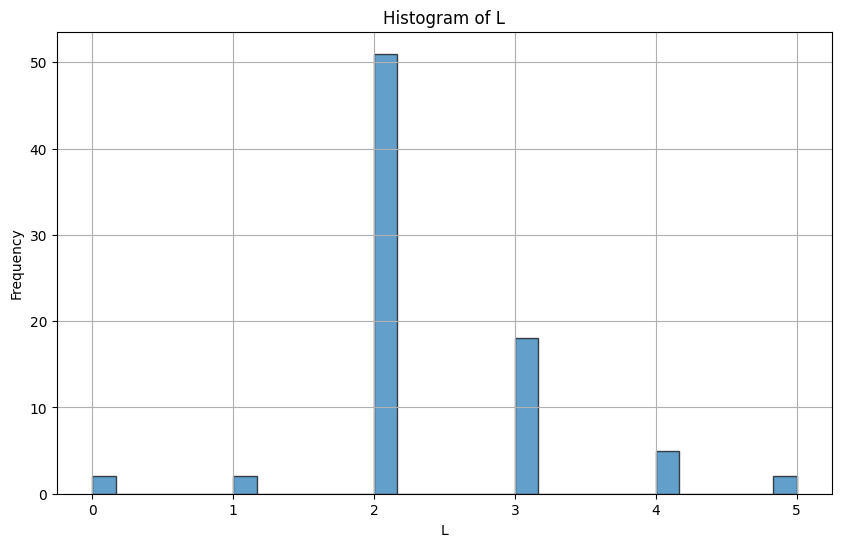

In [11]:
columns = ["year","tmID","lgID","W","L"]

for column in columns: 
    print(f"The distinct {column} are : {csv_teamsPost[column].nunique()}")

# Check for mising values in the columns

missing_columns = csv_teamsPost.columns[csv_teamsPost.isna().any()]
print("The columns that have missing values are:")
print(missing_columns)

# Create histograms

for column in columns:
    plt.figure(figsize=(10, 6))
    plt.hist(csv_teamsPost[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    

# Data Exploration Analysis

Knowing our data, we can start exploring more deeply the data and try to find some insights in order to achieve our goal - Predict which teams went to the playoffs. 

#### Teams performance in First Rounds, Conference Finals and Finals

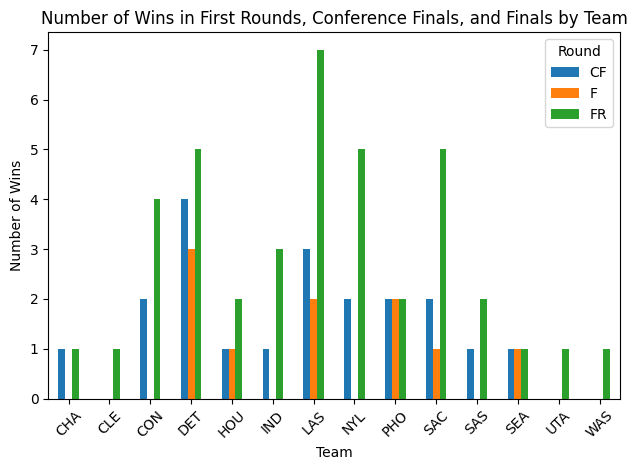

In [12]:
# Filter the data for each round
round_wins = csv_seriesPost.groupby(['tmIDWinner', 'round']).size().unstack(fill_value=0)

# Plot
round_wins.plot(kind='bar', stacked=False)
plt.title('Number of Wins in First Rounds, Conference Finals, and Finals by Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.legend(title='Round', loc='upper right')
plt.tight_layout()
plt.show()

#### Number of games won by the teams in Playoff Rounds

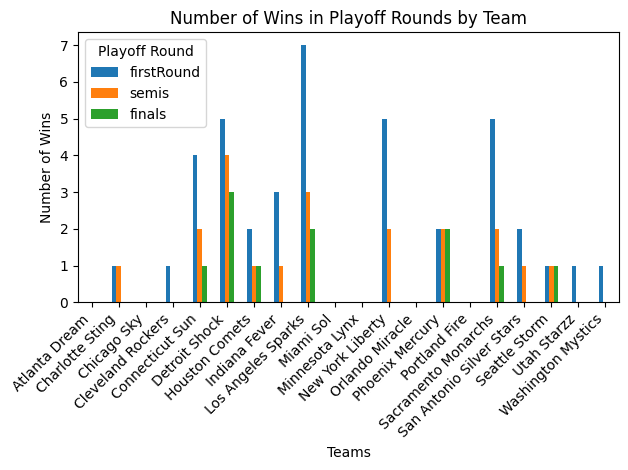

In [13]:
playoff_columns = ['name', 'firstRound', 'semis', 'finals']
playoff_csv_teams = csv_teams[playoff_columns].copy()  

playoff_csv_teams.loc[:, 'firstRound'] = playoff_csv_teams['firstRound'].apply(lambda x: 1 if x == 'W' else 0)
playoff_csv_teams.loc[:, 'semis'] = playoff_csv_teams['semis'].apply(lambda x: 1 if x == 'W' else 0)
playoff_csv_teams.loc[:, 'finals'] = playoff_csv_teams['finals'].apply(lambda x: 1 if x == 'W' else 0)

grouped_playoff_csv_teams = playoff_csv_teams.groupby('name').sum()

grouped_playoff_csv_teams.plot(kind='bar', stacked=False)
plt.title("Number of Wins in Playoff Rounds by Team")
plt.xlabel("Teams")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Playoff Round")
plt.tight_layout()

plt.show()

#### Offensive stats of the teams that won at least 1 game in the playoffs

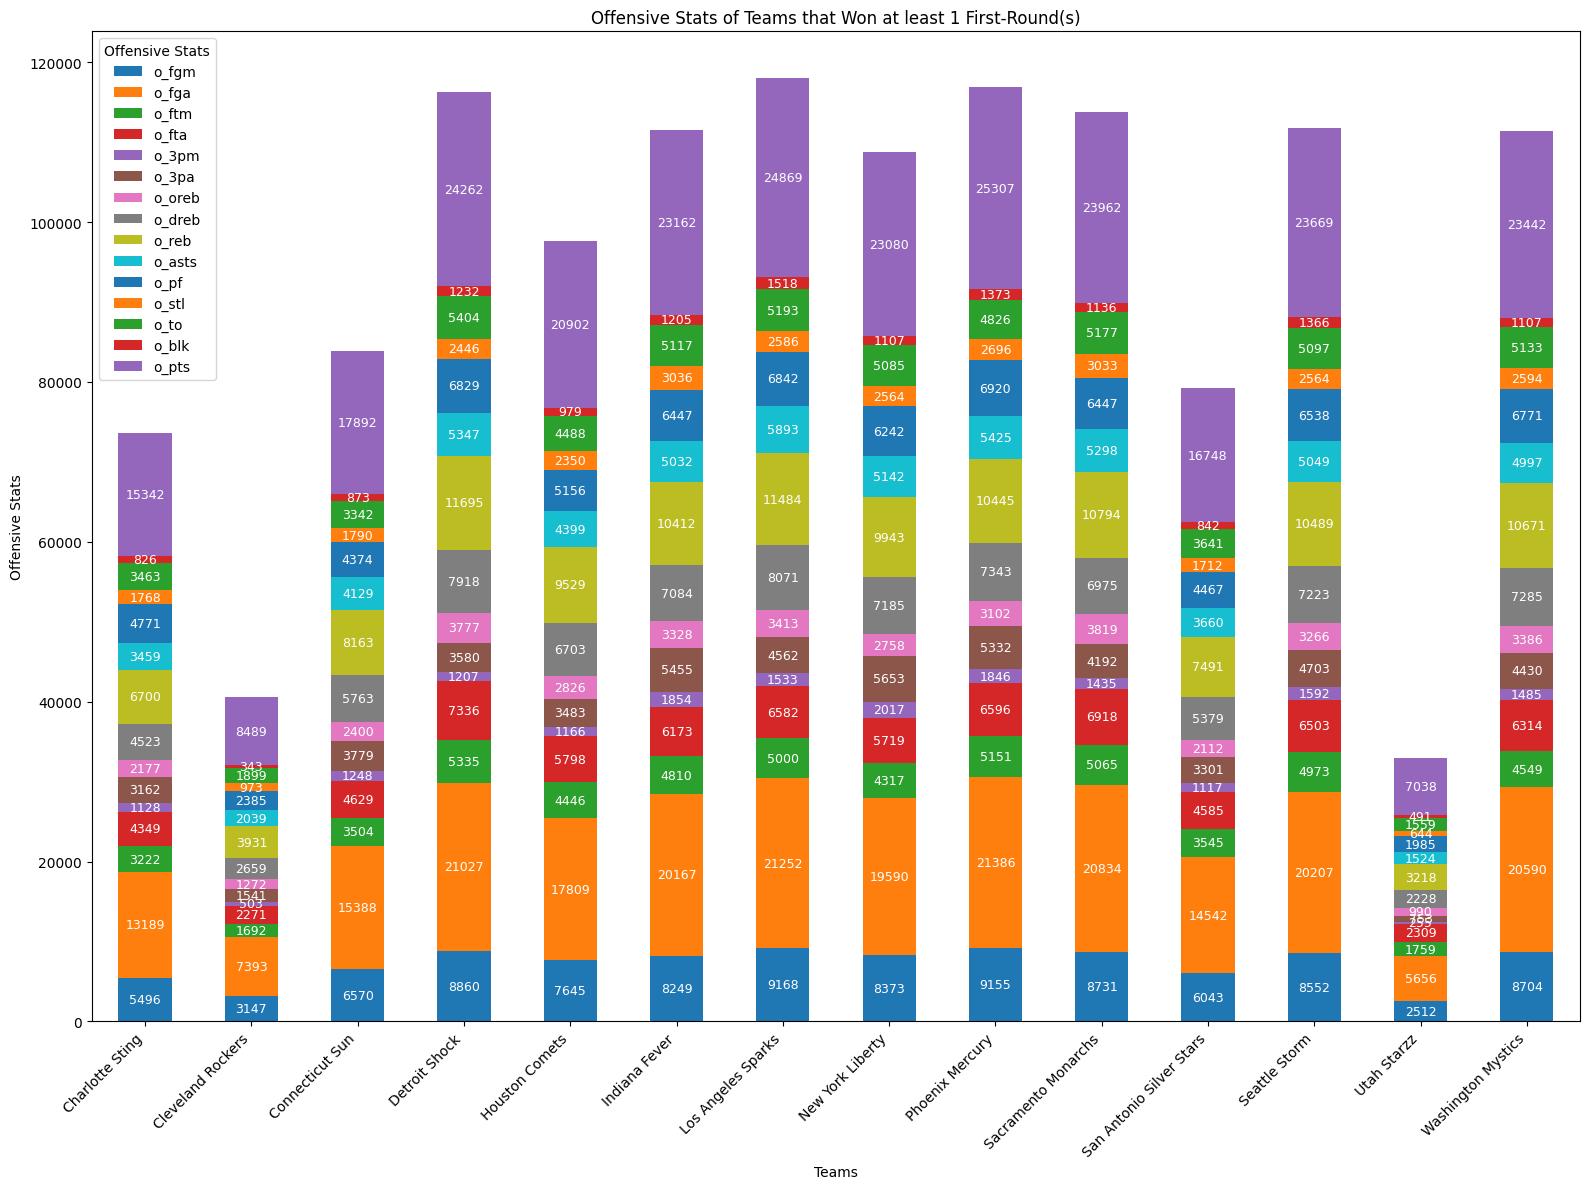

In [14]:
# Filter the relevant columns: offensive stats and first-round outcome
defensive_columns = [col for col in csv_teams.columns if col.startswith("o_")]
filtered_columns = ['name', 'firstRound'] + defensive_columns
offensive_csv_teams = csv_teams[filtered_columns].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Convert the 'firstRound' column to a binary indicator of wins
offensive_csv_teams.loc[:, 'firstRound'] = offensive_csv_teams['firstRound'].apply(lambda x: 1 if x == 'W' else 0)

# Group by team and sum the number of first-round wins
grouped_offensive_csv_teams = offensive_csv_teams.groupby('name').sum()

# Filter teams that have won x number of first rounds (change 'x' to the number of wins you want to filter by)
x = 1  # For example, teams that won 1 first-round
teams_with_x_wins = grouped_offensive_csv_teams[grouped_offensive_csv_teams['firstRound'] >= x]

# Create the plot with increased figure size
ax = teams_with_x_wins[defensive_columns].plot(kind='bar', stacked=True, figsize=(16, 12))
plt.title(f"Offensive Stats of Teams that Won at least {x} First-Round(s)")
plt.xlabel("Teams")
plt.ylabel("Offensive Stats")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Offensive Stats")
plt.tight_layout()

# Annotate the bars with the values
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', 
                ha='center', va='center', fontsize=9, color='white')

# Show the plot
plt.show()

#### Defensive stats of the teams that won at least 1 game in the playoffs

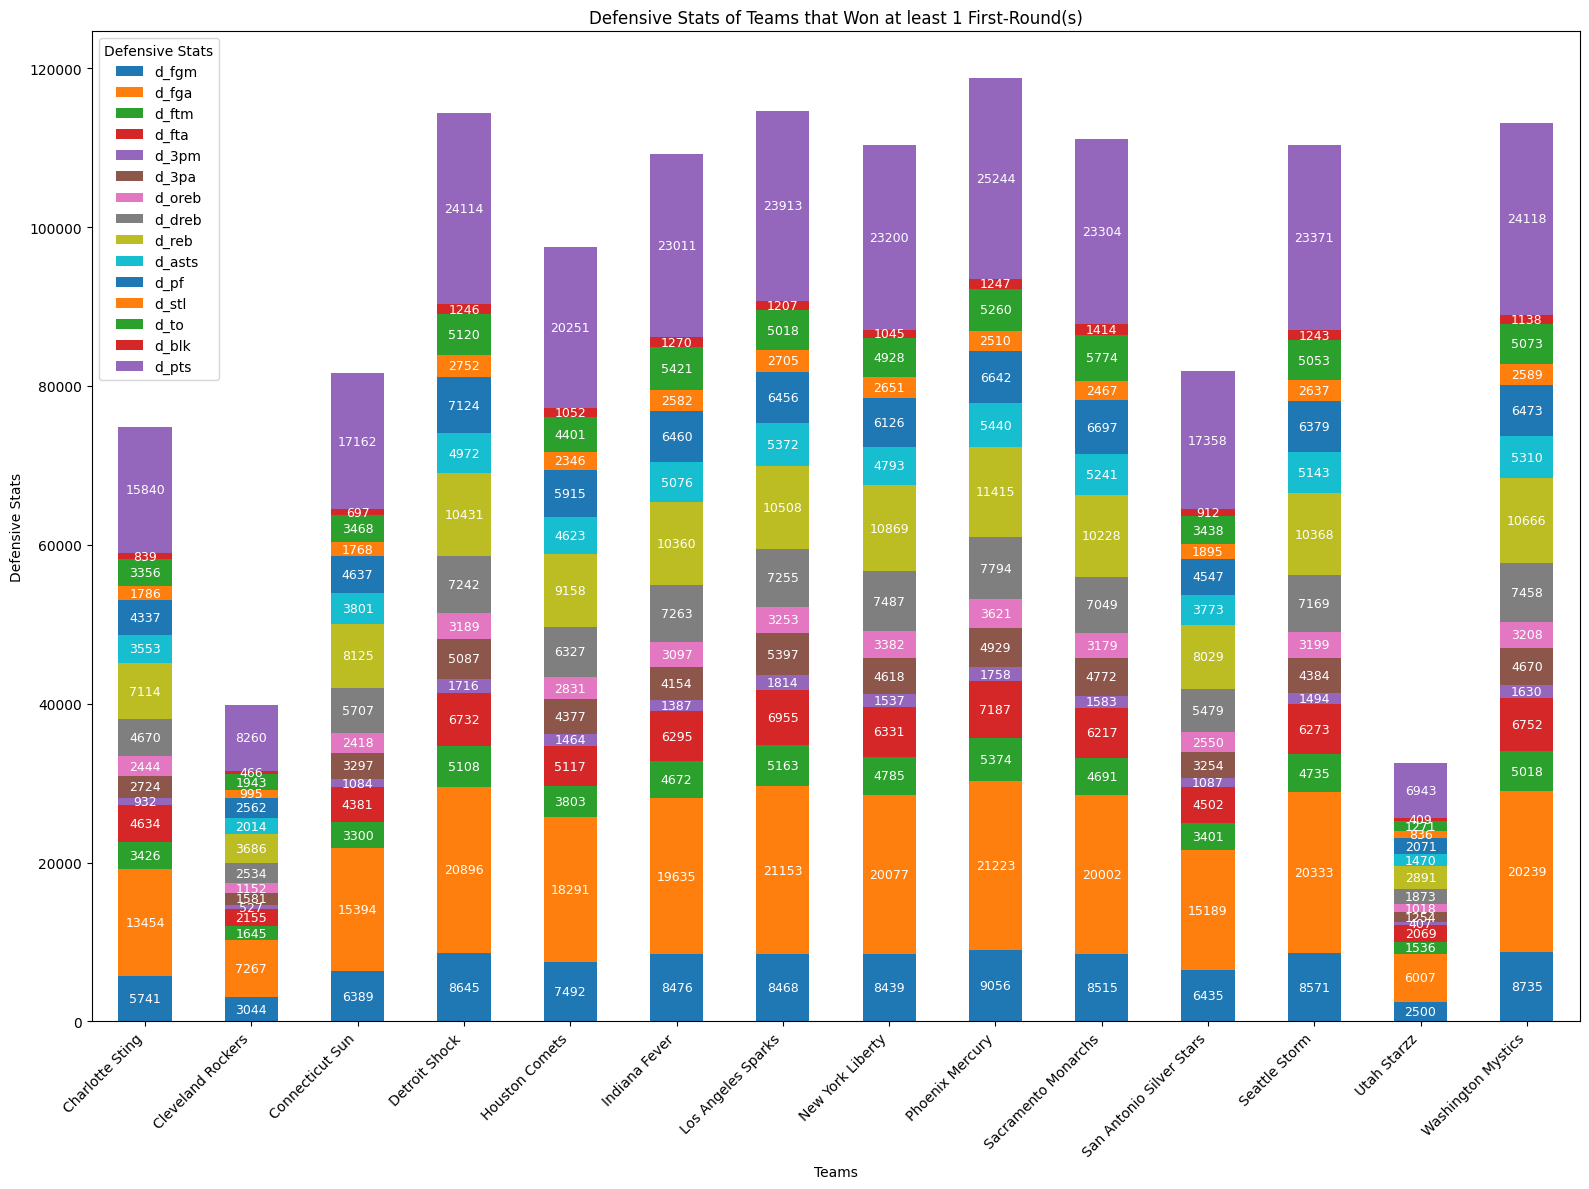

In [15]:
# Filter the relevant columns: defensive stats and first-round outcome
defensive_columns = [col for col in csv_teams.columns if col.startswith("d_")]
filtered_columns = ['name', 'firstRound'] + defensive_columns
defensive_csv_teams = csv_teams[filtered_columns].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Convert the 'firstRound' column to a binary indicator of wins
defensive_csv_teams.loc[:, 'firstRound'] = defensive_csv_teams['firstRound'].apply(lambda x: 1 if x == 'W' else 0)

# Group by team and sum the number of first-round wins
grouped_defensive_csv_teams = defensive_csv_teams.groupby('name').sum()

# Filter teams that have won x number of first rounds (change 'x' to the number of wins you want to filter by)
x = 1  # For example, teams that won 1 first-round
teams_with_x_wins = grouped_defensive_csv_teams[grouped_defensive_csv_teams['firstRound'] >= x]

# Create the plot with increased figure size
ax = teams_with_x_wins[defensive_columns].plot(kind='bar', stacked=True, figsize=(16, 12))
plt.title(f"Defensive Stats of Teams that Won at least {x} First-Round(s)")
plt.xlabel("Teams")
plt.ylabel("Defensive Stats")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Defensive Stats")
plt.tight_layout()

# Annotate the bars with the values
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', 
                ha='center', va='center', fontsize=9, color='white')

# Show the plot
plt.show()

#### Playoffs Performance for each team that won at least 1 first round in the playoffs

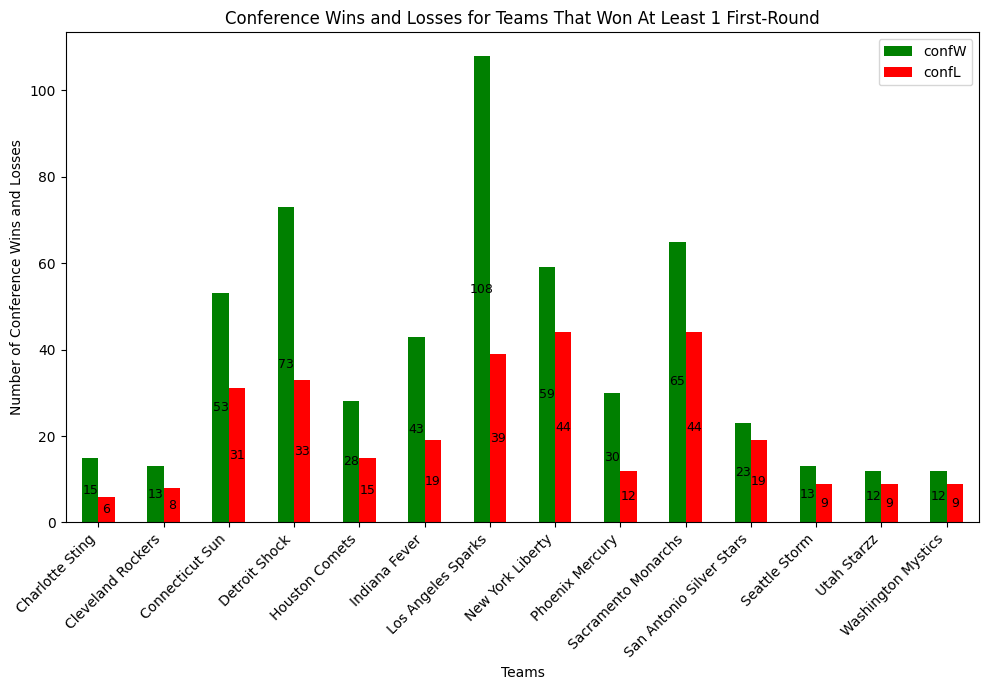

In [16]:
import matplotlib.pyplot as plt

# Filter the relevant columns: first round, conference wins (confW), and conference losses (confL)
filtered_columns = ['name', 'firstRound', 'confW', 'confL']
conf_df = csv_teams[filtered_columns].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Convert 'firstRound' column to a binary indicator of wins
conf_df.loc[:, 'firstRound'] = conf_df['firstRound'].apply(lambda x: 1 if x == 'W' else 0)

# Filter teams that have won at least one first round
teams_with_first_round_win = conf_df[conf_df['firstRound'] >= 1]

# Group by team and sum the conference wins and losses
grouped_conf_df = teams_with_first_round_win.groupby('name').sum()

# Create the plot for conference wins and losses
ax = grouped_conf_df[['confW', 'confL']].plot(kind='bar', stacked=False, figsize=(10, 7), color=['green', 'red'])

# Add title and labels
plt.title("Conference Wins and Losses for Teams That Won At Least 1 First-Round")
plt.xlabel("Teams")
plt.ylabel("Number of Conference Wins and Losses")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with the values
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', 
                ha='center', va='center', fontsize=9, color='black')

# Show the plot
plt.show()

#### Coach appearance in the playoffs

Number of distinct coaches who have qualified for the playoffs: 36
Number of distinct coaches who haven't qualified for the playoffs: 21


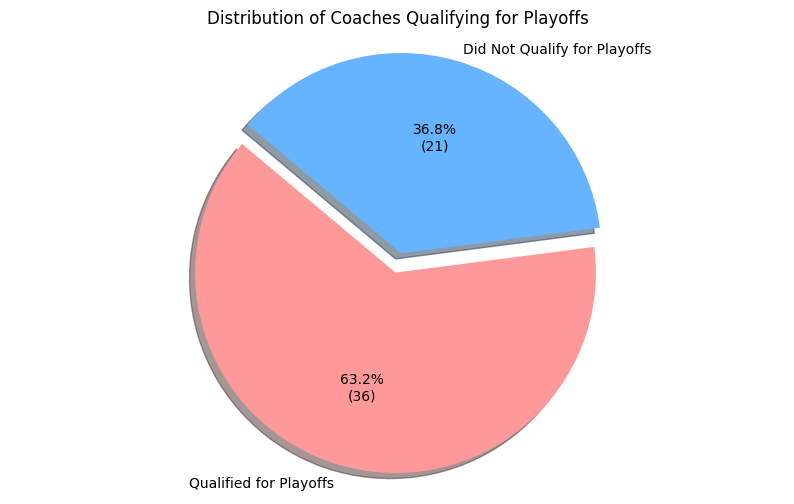

Number of distinct teams who have qualified for the playoffs: 18
Number of distinct teams who haven't qualified for the playoffs: 2

Teams that haven't qualified for the playoffs:
53     CHI
86     POR
87     POR
88     POR
105    CHI
106    CHI
130    CHI
Name: tmID, dtype: object


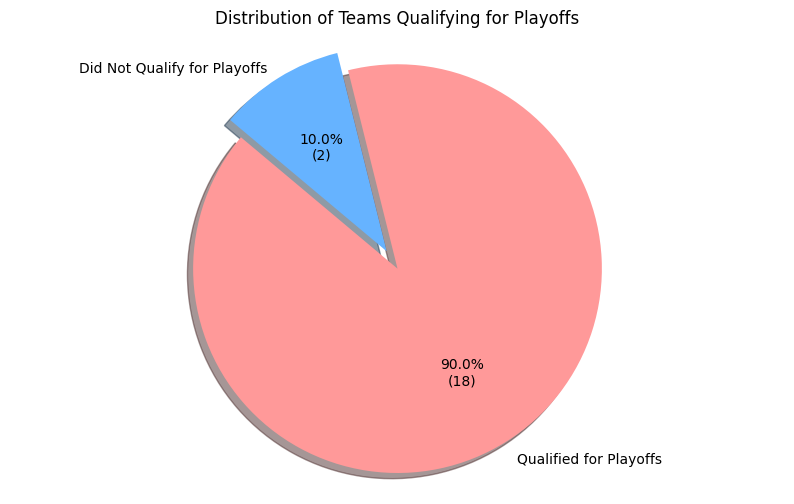

In [25]:
pd.set_option('display.max_rows', None)

# Merging the data
merged_data = pd.merge(csv_coaches, csv_teams, on=['tmID', 'year'])

# Getting the distinct coaches who have and haven't qualified for the playoffs
playoff_coaches = merged_data[merged_data['playoff'] == 'Y']['coachID']
non_playoff_coaches = merged_data[~merged_data['coachID'].isin(playoff_coaches)]['coachID']

# Counting the number of distinct coaches
num_playoff_coaches = playoff_coaches.nunique()
num_non_playoff_coaches = non_playoff_coaches.nunique()

print(f"Number of distinct coaches who have qualified for the playoffs: {num_playoff_coaches}")
print(f"Number of distinct coaches who haven't qualified for the playoffs: {num_non_playoff_coaches}")

# Data for the pie chart
labels = ['Qualified for Playoffs', '\nDid Not Qualify for Playoffs']
sizes = [num_playoff_coaches, num_non_playoff_coaches]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice

# Function to display both percentage and number
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_format

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=autopct_format(sizes),
        shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Coaches Qualifying for Playoffs')
plt.show()


# Merging the data
merged_data = pd.merge(csv_coaches, csv_teams, on=['tmID', 'year'])

# Getting the distinct teams who have and haven't qualified for the playoffs
playoff_teams = merged_data[merged_data['playoff'] == 'Y']['tmID']
non_playoff_teams = merged_data[~merged_data['tmID'].isin(playoff_teams)]['tmID']

# Counting the number of distinct teams
num_playoff_teams = playoff_teams.nunique()
num_non_playoff_teams = non_playoff_teams.nunique()

print(f"Number of distinct teams who have qualified for the playoffs: {num_playoff_teams}")
print(f"Number of distinct teams who haven't qualified for the playoffs: {num_non_playoff_teams}")



print("\nTeams that haven't qualified for the playoffs:")
print(non_playoff_teams)

# Data for the pie chart
labels = ['Qualified for Playoffs', '\nDid Not Qualify for Playoffs']
sizes = [num_playoff_teams, num_non_playoff_teams]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice

# Function to display both percentage and number
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_format

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=autopct_format(sizes),
        shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Teams Qualifying for Playoffs')
plt.show()

#### Award Players

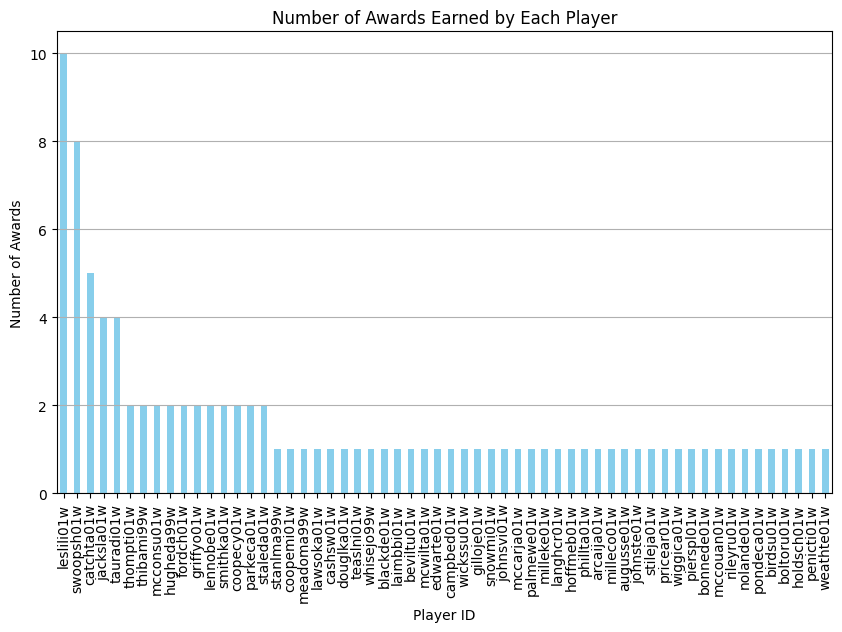

In [18]:
# List of standard award names
standard_awards = [
    'all-star game most valuable player', 'coach of the year', 'defensive player of the year',
    'kim perrot sportsmanship award', 'most improved player', 'most valuable player',
    'rookie of the year', 'sixth woman of the year', 'wnba all decade team honorable mention',
    'wnba all-decade team', 'wnba finals most valuable player'
]

# Function to normalize award names
def normalize_award_name(award_name):
    award_name = award_name.lower().replace(' awards', ' award').strip()
    # Check in the standard awards list if there is any exact match 
    for standard_award in standard_awards:
        if award_name == standard_award:
            return award_name
    else:  
        # Search for a similar award name in the standard awards list
        for standard_award in standard_awards:
            if award_name in standard_award:
                return standard_award

# Apply normalization to the 'award' column
csv_awardsPlayers['normalized_award'] = csv_awardsPlayers['award'].apply(normalize_award_name)

# Merge the playerID from the csv_awardsPlayers with the bioID from the csv_players
merged_awards_players = pd.merge(csv_awardsPlayers, csv_players, left_on='playerID', right_on='bioID')


# Get the playerID and normalized_award columns where the normalized_award is not null

grouped_by_award_player = merged_awards_players[['playerID', 'normalized_award']].dropna()


# Plot the awards earned by each player in a bar chart and where the y axis the playerID and the x axis is the number of awards earned
plt.figure(figsize=(10, 6))
grouped_by_award_player['playerID'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Awards Earned by Each Player')
plt.xlabel('Player ID')
plt.ylabel('Number of Awards')
plt.grid(axis='y')